**Neural Network Classificaton with Tf**
- Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data.
- For example:
  - Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
  - Decide whether a photo is of a food, a person or a dog. This is called a multi-class classification since there are more than two options.
  - Predict what categories should be assigned to a Wikipedia article. This is called a multi-label classification since a single article could have more than one category assigned.

# Churn Prediction Model using Tf
- Using Bank Customer Data, We are building a prediction system which can predict if a customer will leave the Bank or Not.
- This is called Churning.
- It is a Binary Classification Problem (0-leave the bank/not churn, 1-not leave the bank/churn)

In [1]:
import pandas as pd

In [2]:
data_url = 'https://raw.githubusercontent.com/Vikas-KM/tensorflow-learning/master/datasets/Churn_Modelling.csv'
data = pd.read_csv(data_url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [5]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


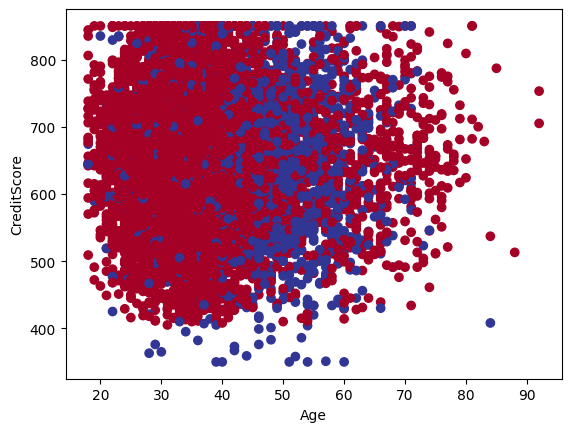

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=data['Age'],y=data['CreditScore'],c=data['Exited'],cmap=plt.cm.RdYlBu)
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()

**Selecting the important columns**

In [7]:
X = data.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
y = data['Exited']

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

**Preprocessing the data**

In [19]:
ct = make_column_transformer(
    (MinMaxScaler(),['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary']),
    (OneHotEncoder(handle_unknown='ignore'),['Geography','Gender'])
)

In [20]:
from sklearn.model_selection import train_test_split
# split the data into train and test test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(8000, 10)

In [22]:
ct.fit(X_train)
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)


In [23]:
X_train_norm[0]

array([0.672     , 0.18918919, 0.6       , 0.        , 0.33333333,
       1.        , 1.        , 0.89555028, 1.        , 0.        ,
       0.        , 0.        , 1.        ])

In [24]:
X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [25]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [26]:
X_train_norm[0], y_train.iloc[0]

(array([0.672     , 0.18918919, 0.6       , 0.        , 0.33333333,
        1.        , 1.        , 0.89555028, 1.        , 0.        ,
        0.        , 0.        , 1.        ]),
 np.int64(0))

In [27]:
import tensorflow as tf # with tensorflow 2.19.0

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'), # activation = tf.keras.activations.relu
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_1.fit(X_train_norm, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7796 - loss: 0.5013
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.3968
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8444 - loss: 0.3807
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8506 - loss: 0.3668
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3723
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.3669
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8619 - loss: 0.3376
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8565 - loss: 0.3548
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8614 - loss: 0.3427
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8622 - loss: 0.3418
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8516 - loss: 0.3580
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [28]:
loss, accuracy = model_1.evaluate(X_test_norm, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3635
Model loss on the test set: 0.37533071637153625
Model accuracy on the test set: 0.8650000095367432


**Plot the loss curves (also referred to as learning curves)**


In [29]:
import pandas as pd
loss_accu = pd.DataFrame(history.history)
loss_accu

,accuracy,loss
0,0.799625,0.465820
1,0.833125,0.399133
2,0.847250,0.371628
3,0.852250,0.364362
4,0.850750,0.363150
...,...,...
95,0.875250,0.301276
96,0.873000,0.306039
97,0.874125,0.299690
98,0.875625,0.305443


<Axes: >

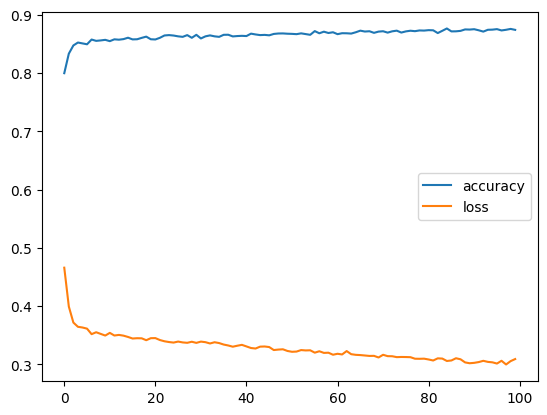

In [30]:
loss_accu.plot()

In [27]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 256)              │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,245 (540.02 KB)

 Trainable params: 46,081 (180.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,164 (360.02 KB)

It seems to be some place of improvement that can be done in our model.

**Finding the best learning rate**
- To find out the best learning rate we're going to use the following:
  - A learning rate callback: think of a callback as an extra piece of functionality you can add to your model while training.
  - A modified loss curves plot.
  

In [31]:
import tensorflow as tf # with tensorflow 2.19.0
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'), # activation = tf.keras.activations.relu
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# creating a learning rate scheduler callback
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(X_train_norm,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7509 - loss: 0.5819 - learning_rate: 1.0000e-04
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7942 - loss: 0.4735 - learning_rate: 1.1220e-04
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8003 - loss: 0.4568 - learning_rate: 1.2589e-04
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8129 - loss: 0.4363 - learning_rate: 1.4125e-04
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8180 - loss: 0.4190 - learning_rate: 1.5849e-04
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8293 - loss: 0.3971 - learning_rate: 1.7783e-04
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8428 - loss: 0.3680 - learning_rate: 1.9953e-04
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8507 - loss: 0.3508 - learning_rate: 2.2387e-04
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 

<Axes: xlabel='epochs'>

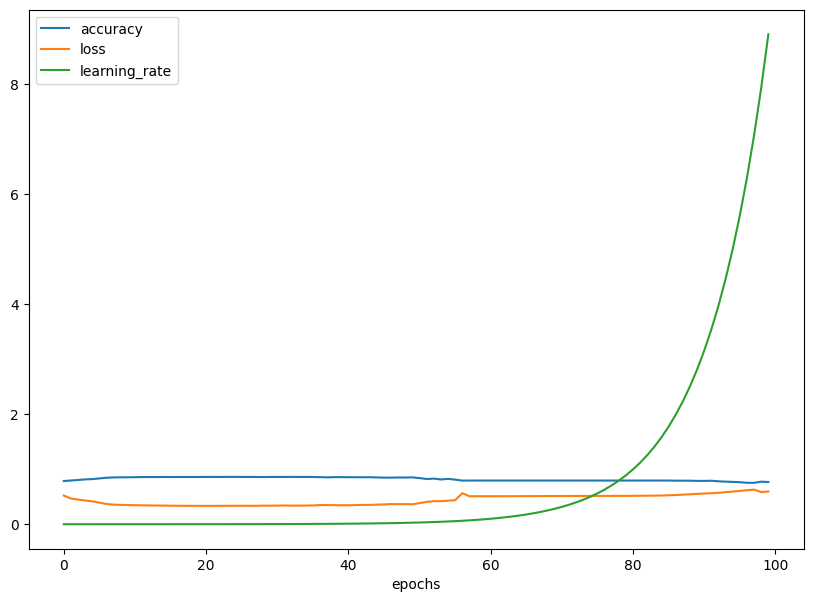

In [33]:
pd.DataFrame(history_2.history).plot(figsize=(10,7),xlabel='epochs')

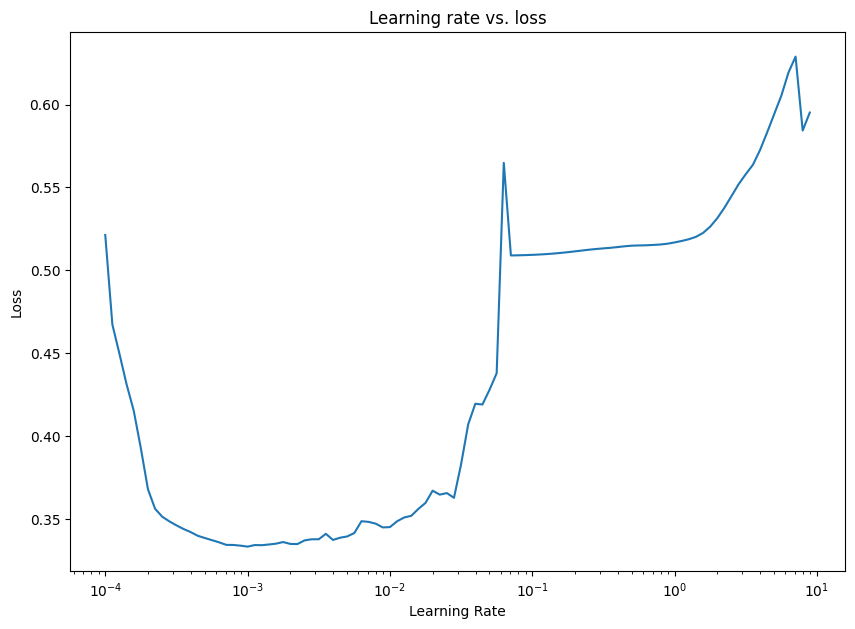

In [35]:
import numpy as np
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

**Approaching a different method of feature scaling - Standardization**

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = make_column_transformer(
    (StandardScaler(),['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary']),
    (OneHotEncoder(handle_unknown='ignore'),['Geography','Gender'])
)

from sklearn.model_selection import train_test_split
# split the data into train and test test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [11]:
import tensorflow as tf # with tensorflow 2.19.0

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'), # activation = tf.keras.activations.relu
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_3.fit(X_train_norm, y_train, epochs=50, batch_size=32)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7888 - loss: 0.4562
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8539 - loss: 0.3511
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.3449
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8624 - loss: 0.3314
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3225
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3267
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8770 - loss: 0.3026
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.3152
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3170
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3060
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.3012
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

<Axes: xlabel='epochs'>

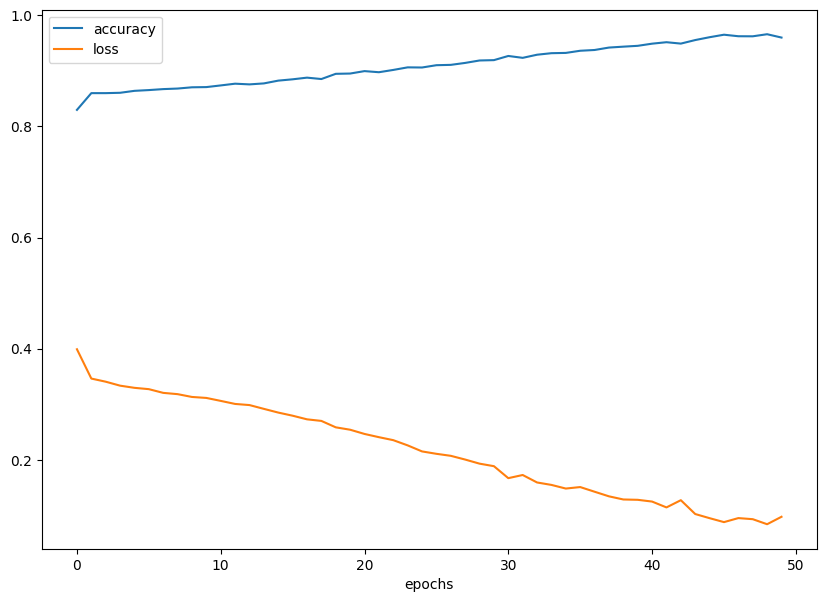

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

In [13]:
model_3.evaluate(X_test_norm, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8097 - loss: 0.8623


[0.9659366011619568, 0.809499979019165]

In [14]:
y_preds_prob = model_3.predict(X_test_norm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [15]:
y_preds_prob

array([[1.0260440e-04],
       [1.9115605e-09],
       [1.1398490e-05],
       ...,
       [9.8860008e-01],
       [1.9927340e-02],
       [9.2187619e-01]], dtype=float32)

In [18]:
y_pred = (y_preds_prob > 0.5).astype(int)

In [19]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[1423,  184],
       [ 197,  196]])

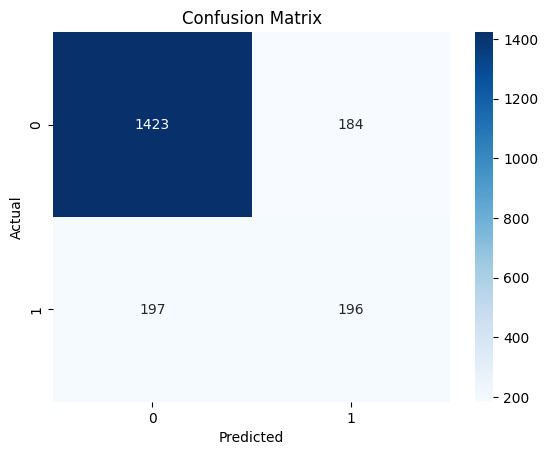

In [22]:
import seaborn as sns
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1607
           1       0.52      0.50      0.51       393

    accuracy                           0.81      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.81      0.81      0.81      2000



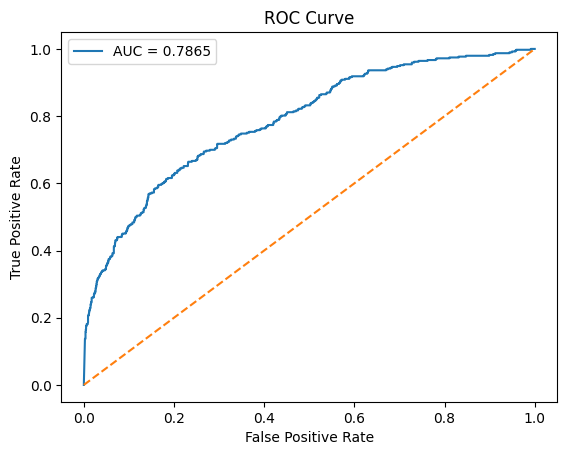

In [24]:

from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)
auc = roc_auc_score(y_test, y_preds_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()